In [295]:
## Data Source: IPUMS Current Population Survey (CPS) March 2022 U.S. households demographics dataset (https://cps.ipums.org/cps/index.shtml)

### Load and Read Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

# Load the DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CPS22M.csv')

# Get the size of the file in bytes
file_size = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/CPS22M.csv')

# Convert the size to megabytes (optional)
file_size_mb = file_size / (1024 * 1024)

print(f'File size: {file_size} bytes ({file_size_mb:.2f} MB)')

# Get general information about the DataFrame
print("General information about the DataFrame:")
print(df.info())

# Adjust the index to start from 1
df.index = df.index + 1

df.head(5) # Shows Top 5 rows of the data set

File size: 25298446 bytes (24.13 MB)
General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152732 entries, 0 to 152731
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       152732 non-null  int64  
 1   serial     152732 non-null  int64  
 2   month      152732 non-null  object 
 3   cpsid      152732 non-null  int64  
 4   asecflag   152732 non-null  object 
 5   asecwth    152732 non-null  float64
 6   pernum     152732 non-null  int64  
 7   cpsidv     152732 non-null  int64  
 8   cpsidp     152732 non-null  int64  
 9   asecwt     152732 non-null  float64
 10  age        152732 non-null  object 
 11  sex        152732 non-null  object 
 12  race       152732 non-null  object 
 13  citizen    152732 non-null  object 
 14  labforce   152732 non-null  object 
 15  uhrswork1  152732 non-null  object 
 16  educ99     152732 non-null  object 
 17  wkswork1   152732 non-null 

,year,serial,month,cpsid,asecflag,asecwth,pernum,cpsidv,cpsidp,asecwt,age,sex,race,citizen,labforce,uhrswork1,educ99,wkswork1,fullpart,incwage
1,2022,1,march,20210102744400,asec,2553.130,1,202101027444011,20210102744401,2553.130,42,male,white,born in u.s,"yes, in the labor force",40,"associate degree, occupational program",52,full-time,44200
2,2022,5,march,20211202723000,asec,1586.800,1,202112027230011,20211202723001,1586.800,62,male,white,born in u.s,"yes, in the labor force",28,"high school graduate, or ged",38,part-time,0
3,2022,5,march,20211202723000,asec,1586.800,2,202112027230021,20211202723002,1586.800,64,female,white,born in u.s,"yes, in the labor force",40,bachelors degree,52,full-time,48000
4,2022,6,march,20220202720300,asec,1492.590,1,202202027203011,20220202720301,1492.590,26,male,white,born in u.s,"yes, in the labor force",50,"some college, no degree",52,full-time,40000
5,2022,6,march,20220202720300,asec,1492.590,2,202202027203021,20220202720302,1492.590,24,female,american indian/aleut/eskimo,born in u.s,"yes, in the labor force",40,"some college, no degree",44,full-time,20000


In [296]:
# Calculate summary statistics for all variables
summary_statistics = df.describe(include='all').T  # include='all' to include categorical data

# Ensure we only keep relevant columns
summary_statistics = summary_statistics[['count', 'mean', 'std', 'min', 'max']]

# Print the summary statistics
print("Summary statistics:")

# The summary statistics with three decimal places
summary_statistics

Summary statistics:


,count,mean,std,min,max
year,152732.000,2022.000,0.000,2022.000,2022.000
serial,152732.000,46207.853,26041.012,1.000,89197.000
month,152732,NaN,NaN,NaN,NaN
cpsid,152732.000,13305305438923.115,9587170769193.746,0.000,20220306852700.000
asecflag,152732,NaN,NaN,NaN,NaN
asecwth,152732.000,2092.210,1262.280,117.220,9975.380
pernum,152732.000,2.225,1.392,1.000,16.000
cpsidv,152732.000,133053054389245.828,95871707691948.062,0.000,202203068527031.000
cpsidp,152732.000,13305305438924.514,9587170769194.756,0.000,20220306852703.000
asecwt,152732.000,2152.279,1338.403,103.560,17421.760


In [297]:
# Some of the variables/column values are string.
# So, Convert string variables to numeric and encode the categorical variables
df['age'] = df['age'].replace('under 1 year', '0').astype(float)

for col in ['month', 'asecflag','sex', 'race', 'citizen', 'labforce', 'uhrswork1', 'educ99', 'fullpart']:
    df[col + '_encoded'] = pd.Categorical(df[col]).codes

# Drop the previous string variables
df.drop(columns=['month', 'asecflag','sex', 'race', 'citizen', 'labforce', 'uhrswork1', 'educ99', 'fullpart'], inplace=True)

# Directly display the first few rows of the modified DataFrame in an interactive environment
df.head(5)


,year,serial,cpsid,asecwth,pernum,cpsidv,cpsidp,asecwt,age,wkswork1,incwage,month_encoded,asecflag_encoded,sex_encoded,race_encoded,citizen_encoded,labforce_encoded,uhrswork1_encoded,educ99_encoded,fullpart_encoded
1,2022,1,20210102744400,2553.130,1,202101027444011,20210102744401,2553.130,42.000,52,44200,0,0,1,13,1,2,35,7,0
2,2022,5,20211202723000,1586.800,1,202112027230011,20211202723001,1586.800,62.000,38,0,0,0,1,13,1,2,21,10,2
3,2022,5,20211202723000,1586.800,2,202112027230021,20211202723002,1586.800,64.000,52,48000,0,0,0,13,1,2,35,8,0
4,2022,6,20220202720300,1492.590,1,202202027203011,20220202720301,1492.590,26.000,52,40000,0,0,1,13,1,2,46,15,0
5,2022,6,20220202720300,1492.590,2,202202027203021,20220202720302,1492.590,24.000,44,20000,0,0,0,2,1,2,35,15,0


In [298]:
### Data cleaning for outliers, missing values and modification for analysis

# Keep only full-time workers
df = df[df['fullpart_encoded'] == 0]

# Keep rows with income values after removing outliers
df = df[(df['incwage'] > 0) & (df['incwage'] <  99999999)]

# Keep working age categories (age 24-65)
df = df[(df['age'] >= 24) & (df['age'] <= 65)]

# Drop rows where uhrswork1_encoded is less than 35, or equal to 997, or equal to 999
df = df[~((df['uhrswork1_encoded'] < 35) | (df['uhrswork1_encoded'] == 997) | (df['uhrswork1_encoded'] == 999))]

# Keep only workers in the labor force
df = df[df['labforce_encoded'] == 2]

# Calculate summary statistics for all variables
summary_stats_cleaned = df.describe(include='all').T
summary_stats_cleaned['count'] = summary_stats_cleaned['count']  # Rename if needed
summary_stats_cleaned = summary_stats_cleaned[['count', 'mean', 'std', 'min', 'max']]

# Print summary statistics with three decimal places
print("Summary statistics after data cleaning:")
summary_stats_cleaned

Summary statistics after data cleaning:


,count,mean,std,min,max
year,46680.000,2022.000,0.000,2022.000,2022.000
serial,46680.000,45881.507,25960.030,1.000,89197.000
cpsid,46680.000,13377743990645.396,9562833039367.770,0.000,20220306852700.000
asecwth,46680.000,2169.522,1322.240,120.810,9870.350
pernum,46680.000,1.621,0.915,1.000,15.000
cpsidv,46680.000,133777439906465.281,95628330393685.797,0.000,202203068527011.000
cpsidp,46680.000,13377743990646.461,9562833039368.529,0.000,20220306852701.000
asecwt,46680.000,2217.343,1384.234,120.810,17421.760
age,46680.000,43.155,11.091,24.000,65.000
wkswork1,46680.000,50.080,6.951,1.000,52.000


In [299]:
### Mean Income Wage by Education Level

# Define the mapping of educ99_encoded to education levels
education_mapping = {
    0: '10th grade',
    1: '11th grade',
    2: '12th grade, no degree',
    3: '1st-4th grade',
    4: '5th-8th grade',
    5: '9th grade',
    6: 'Academic assoc. degree',
    7: 'Occupational assoc. degree',
    8: 'bachelors degree',
    9: 'doctorate degree',
    10: 'high school grad',
    11: 'masters degree',
    13: 'no school completed',
    14: 'professional degree',
    15: 'some college, no degree'
}

# Calculate the mean wage by educ99_encoded
mean_wage_by_educ = df.groupby('educ99_encoded')['incwage'].mean().reset_index()

# Map the encoded values to education levels
mean_wage_by_educ['education_level'] = mean_wage_by_educ['educ99_encoded'].map(education_mapping)

# Sort the DataFrame by educ99_encoded
mean_wage_by_educ = mean_wage_by_educ.sort_values(by='educ99_encoded')

# Display the result in a table format
print("Mean Wage by Education Level:")
print(mean_wage_by_educ[['education_level', 'incwage']].to_string(index=False))


Mean Wage by Education Level:
           education_level    incwage
                10th grade  39108.159
                11th grade  41147.090
     12th grade, no degree  46630.435
             1st-4th grade  34697.769
             5th-8th grade  38866.532
                 9th grade  45951.318
    Academic assoc. degree  60304.743
Occupational assoc. degree  61740.454
          bachelors degree  91514.554
          doctorate degree 153242.157
          high school grad  52254.838
            masters degree 106380.833
       no school completed  38289.574
       professional degree 185042.378
   some college, no degree  59292.039


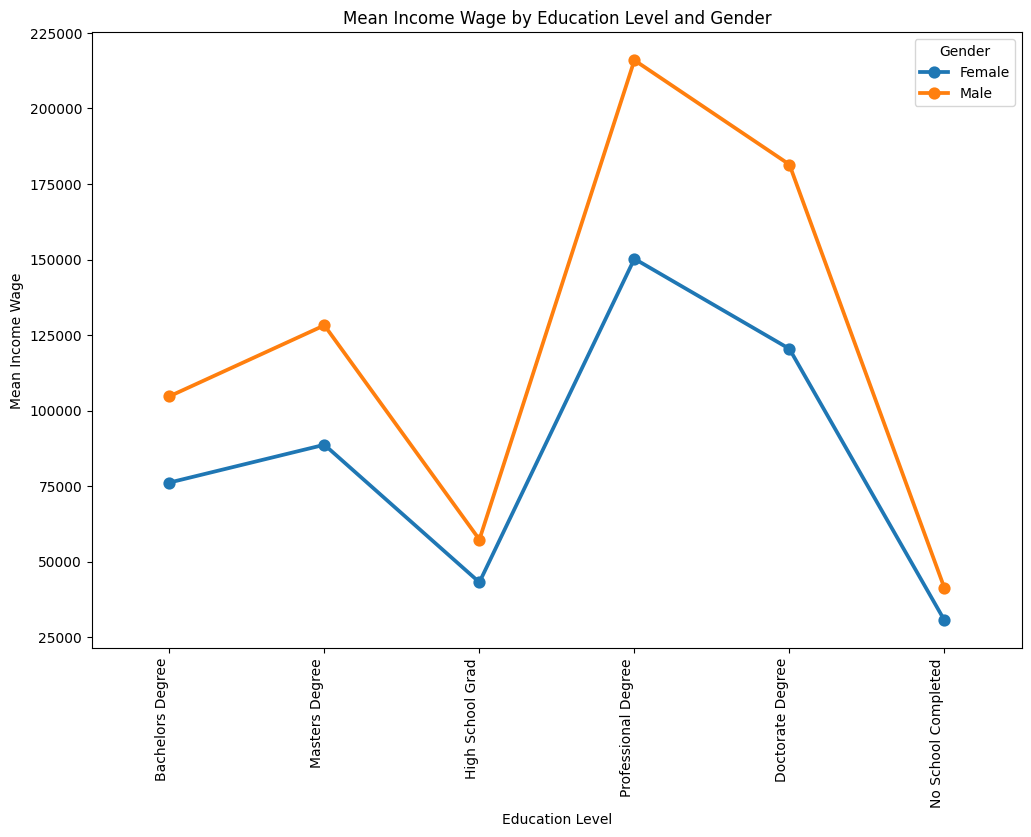

In [300]:
## Mean Income Wage by Education Level and Gender

# Define the mapping of educ99_encoded to education levels
education_mapping = {
    8: 'Bachelors Degree',
    9: 'Doctorate Degree',
    10: 'High School Grad',
    11: 'Masters Degree',
    13: 'No School Completed',
    14: 'Professional Degree'
}

# Filter the original DataFrame to keep only the specified education levels
filtered_df = df[df['educ99_encoded'].isin(education_mapping.keys())].copy()

# Map the educ99_encoded values to the corresponding education levels
filtered_df['education_level'] = filtered_df['educ99_encoded'].map(education_mapping)

# Create a new column for gender based on sex_encoded
filtered_df['gender'] = filtered_df['sex_encoded'].map({0: 'Female', 1: 'Male'})

# Create a point plot for mean income wage by education level and gender
plt.figure(figsize=(12, 8))
sns.pointplot(x='education_level', y='incwage', hue='gender', data=filtered_df, errorbar=None)
plt.xlabel('Education Level')
plt.ylabel('Mean Income Wage')
plt.title('Mean Income Wage by Education Level and Gender')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender')
plt.show()


## Interpretation of the hypothesis:
Hypothesis: "Gender affects mean income across different education levels."

The line chart suggests that gender disparities in mean income exist across different education levels, with males generally earning more than females, especially at higher levels of education.



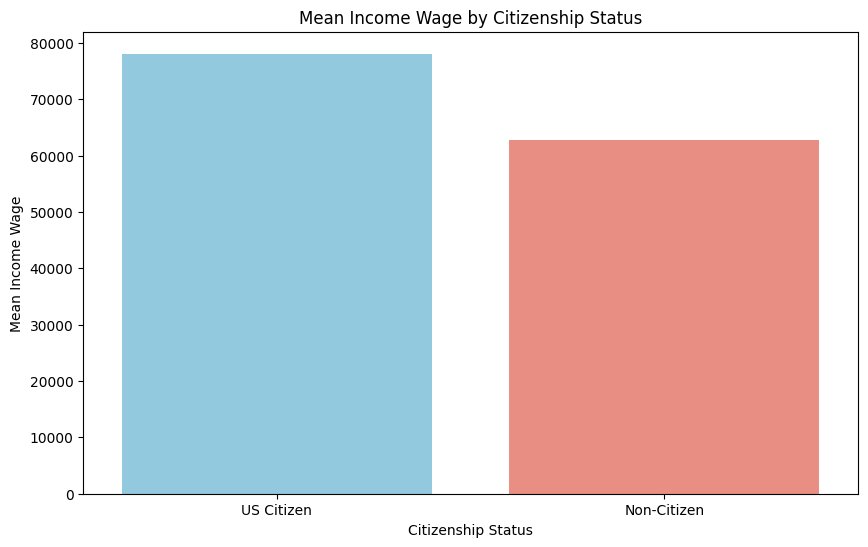

In [301]:
## Mean Income Wage by Citizenship Status

# Define the old mapping (for reference)
old_mapping = {
    0: 'Born abroad of American parents',
    1: 'Born in the U.S.',
    2: 'Born in U.S. Outlying',
    3: 'Naturalized citizen',
    4: 'Not a citizen'
}

# Define the new mapping for analysis
new_mapping = {
    0: 'US Citizen',
    1: 'US Citizen',
    2: 'US Citizen',
    3: 'US Citizen',
    4: 'Non-Citizen'
}

# Apply the new mapping to the citizen_encoded column to create a new citizenship_status column
df['citizenship_status'] = df['citizen_encoded'].map(new_mapping)

# Now, plot the mean income wage by the new citizenship status
plt.figure(figsize=(10, 6))
sns.barplot(x='citizenship_status', y='incwage', data=df, estimator=np.mean, errorbar=None, hue='citizenship_status', palette=['skyblue', 'salmon'])
plt.xlabel('Citizenship Status')
plt.ylabel('Mean Income Wage')
plt.title('Mean Income Wage by Citizenship Status')
plt.xticks()
plt.show()

## Interpretation of the hypothesis:

Hypothesis: "There is a significant difference in mean income wage between US Citizens and Non-Citizens."

Interpretation:

US Citizens appear to have a lower mean income wage than Non-Citizens based on the height of the bars.

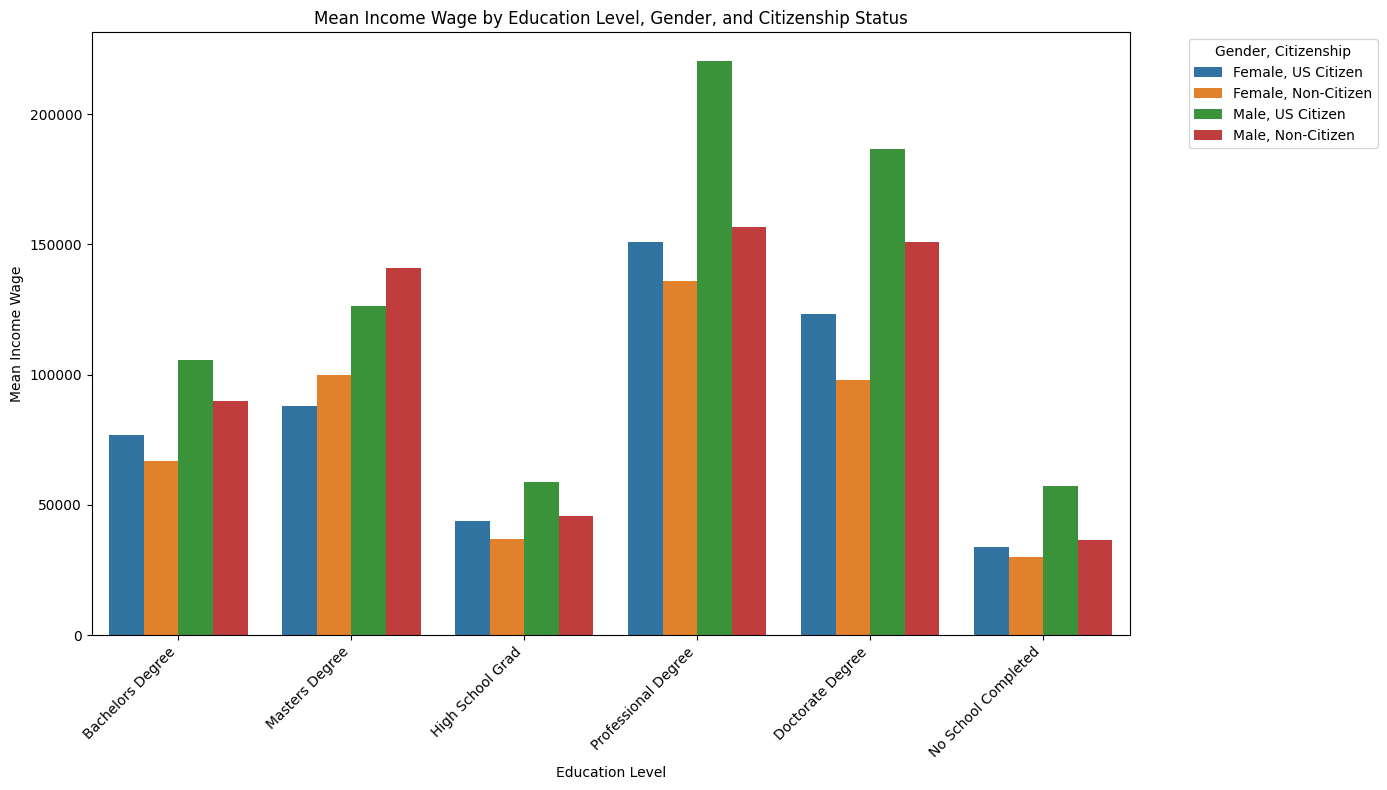

In [302]:
## Mean Income Wage by Education Level, Gender, and Citizenship Status

# Apply the new mapping to the citizen_encoded column
df['citizenship_status'] = df['citizen_encoded'].map(new_mapping)

# Create a new column for gender based on sex_encoded
df['gender'] = df['sex_encoded'].map({0: 'Female', 1: 'Male'})

# Filter the DataFrame and explicitly create a copy
filtered_df = df[df['educ99_encoded'].isin(education_mapping.keys())].copy()

# Map the values to the corresponding education levels
filtered_df['education_level'] = filtered_df['educ99_encoded'].map(education_mapping)

# Create an interaction variable that combines gender and citizenship
filtered_df['gender_citizenship'] = filtered_df['gender'] + ', ' + filtered_df['citizenship_status']

# Create a bar plot with the interaction variable
plt.figure(figsize=(14, 8))
sns.barplot(
    x='education_level',
    y='incwage',
    hue='gender_citizenship',
    data=filtered_df,
    estimator=np.mean,
    errorbar=None  # Changed from ci=None to errorbar=None
)

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Mean Income Wage')
plt.title('Mean Income Wage by Education Level, Gender, and Citizenship Status')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the legend and the plot layout
plt.legend(title='Gender, Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


## Hypothesis:
The mean income is influenced by a combination of education level, gender, and citizenship status.

Across all education levels, there appears to be a trend where citizens earn higher mean wages than non-citizens.

In every education level category, males earn more than females, suggesting a gender wage gap.

The highest mean income wages for both genders and citizenship statuses are observed in individuals with a Doctorate Degree.

The income disparity between different education levels is notable, with higher education generally correlating with higher mean income wages.

The category 'No School Completed' has the lowest mean income wages across all groups, highlighting the economic value of educational attainment.

The wage gap between male US citizens and male non-citizens with Professional
Degrees is significant, which could indicate the influence of citizenship status on income for highly qualified individuals.

In [303]:
## Check the labeling of Race:

# Load the DataFrame again to access the original 'race' column
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CPS22M.csv')

# Convert 'race' to categorical and encode it, then get the mapping
df_original['race_encoded'] = pd.Categorical(df_original['race']).codes
race_categories = pd.Categorical(df_original['race'])
race_mapping = dict(enumerate(race_categories.categories))

# Display the mapping
print("Race Encoding Mapping:")
for code, race in race_mapping.items():
    print(f'{code}: {race}')

Race Encoding Mapping:
0: american indian-asian
1: american indian-hawaiian/pacific islander
2: american indian/aleut/eskimo
3: asian only
4: asian-hawaiian/pacific islander
5: black
6: black-american indian
7: black-american indian-asian
8: black-asian
9: black-hawaiian/pacific islander
10: four or five races, unspecified
11: hawaiian/pacific islander only
12: two or three races, unspecified
13: white
14: white-american indian
15: white-american indian-asian
16: white-american indian-asian-hawaiian/pacific islander
17: white-american indian-hawaiian/pacific islander
18: white-asian
19: white-asian-hawaiian/pacific islander
20: white-black
21: white-black--hawaiian/pacific islander
22: white-black-american indian
23: white-black-american indian-asian
24: white-black-asian
25: white-hawaiian/pacific islander


Mean Income by Racial Categories:
Racial Categories   incwage
            Asian 92924.208
            Black 61689.980
            White 77962.753


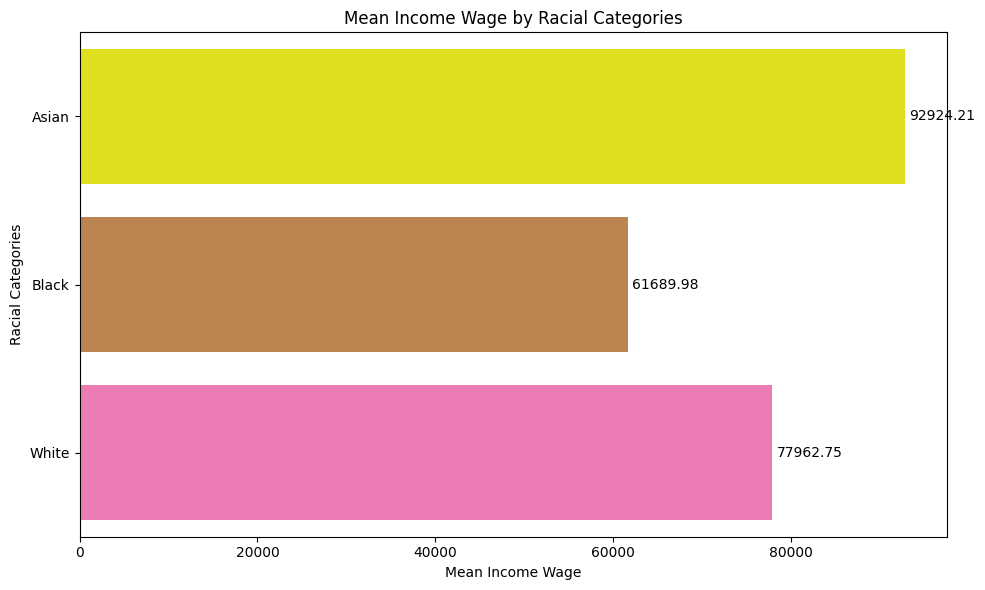

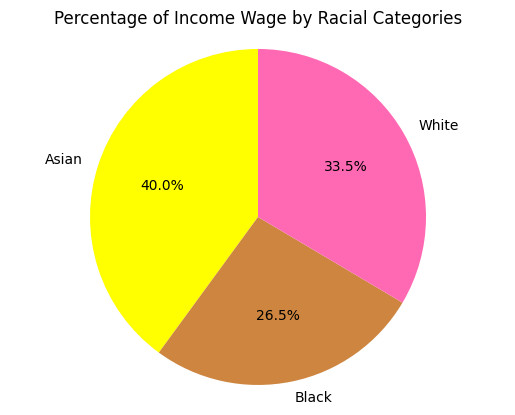

In [304]:
## Mean Income Wage by Racial Categories

# Define the new race mapping
new_race_mapping = {
    13: 0,  # 'white'
    5: 1,   # 'black'
    3: 2,   # 'asian'
}

# Apply the mapping to create 'Racial Categories'
df['Racial Categories'] = df['race_encoded'].map(new_race_mapping)
category_labels = {0: 'White', 1: 'Black', 2: 'Asian'}
df['Racial Categories'] = df['Racial Categories'].map(category_labels)

# Calculate mean wage by racial categories
mean_income_by_race = df.groupby('Racial Categories')['incwage'].mean().reset_index()

# Display the result in a table format
print("Mean Income by Racial Categories:")
print(mean_income_by_race.to_string(index=False))

# Plot the mean income wage by race
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_income_by_race, y='Racial Categories', x='incwage',
            hue='Racial Categories', palette=['yellow', 'peru', 'hotpink'])
plt.ylabel('Racial Categories')
plt.xlabel('Mean Income Wage')
plt.title('Mean Income Wage by Racial Categories')

# Display the values on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

# Calculate the total mean to find percentages
total_mean_income = mean_income_by_race['incwage'].sum()
mean_income_by_race['Percentage'] = (mean_income_by_race['incwage'] / total_mean_income) * 100

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(mean_income_by_race['Percentage'], labels=mean_income_by_race['Racial Categories'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'peru', 'hotpink'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Income Wage by Racial Categories')
plt.show()


## Hypothesis:

Racial categories are a determinant of mean income wage, with significant variations in income distribution across different racial groups.

The horizontal bar chart reveals a hierarchy in mean income wage with Asians at the top, followed by Whites, and Blacks with the lowest wages across educational categories. The pie chart reflects a similar trend in income distribution, with Asians receiving the largest portion, while Whites and Blacks follow with 33.5% and 26.5% shares, respectively.

In [305]:
## Mean Wage by Race and Education Level:
# Define the education order
education_order = {
    'No School Completed': 0,
    'High School Grad': 1,
    'Bachelors Degree': 2,
    'Masters Degree': 3,
    'Professional Degree': 4,
    'Doctorate Degree': 5
}

# Apply the mappings as before
df['education_level'] = df['educ99_encoded'].map(education_mapping)
df['Racial Categories'] = df['race_encoded'].map(new_race_mapping)
df['Racial Categories'] = df['Racial Categories'].map(category_labels)

# Filter and calculate mean wage by racial categories and education level
filtered_df = df[df['educ99_encoded'].isin(education_mapping.keys())]
mean_wage_by_race_and_education = filtered_df.groupby(['Racial Categories', 'education_level'])['incwage'].mean().reset_index()

# Map the education levels to the defined order for sorting
mean_wage_by_race_and_education['education_order'] = mean_wage_by_race_and_education['education_level'].map(education_order)

# Sort by 'Racial Categories' and 'education_order'
sorted_mean_wage = mean_wage_by_race_and_education.sort_values(by=['Racial Categories', 'education_order'])

# Drop the 'education_order' column as it's no longer needed
sorted_mean_wage.drop('education_order', axis=1, inplace=True)

# Display the organized result
print("Organized Mean Wage by Race and Education Level:")
print(sorted_mean_wage.to_string(index=False))


Organized Mean Wage by Race and Education Level:
Racial Categories     education_level    incwage
            Asian No School Completed  37857.143
            Asian    High School Grad  46143.572
            Asian    Bachelors Degree  91299.201
            Asian      Masters Degree 123305.262
            Asian Professional Degree 187793.952
            Asian    Doctorate Degree 147120.858
            Black No School Completed  28333.333
            Black    High School Grad  46165.227
            Black    Bachelors Degree  75764.528
            Black      Masters Degree  86200.868
            Black Professional Degree 139597.260
            Black    Doctorate Degree 134485.794
            White No School Completed  38992.364
            White    High School Grad  53992.757
            White    Bachelors Degree  93862.716
            White      Masters Degree 106447.352
            White Professional Degree 190586.982
            White    Doctorate Degree 158238.831


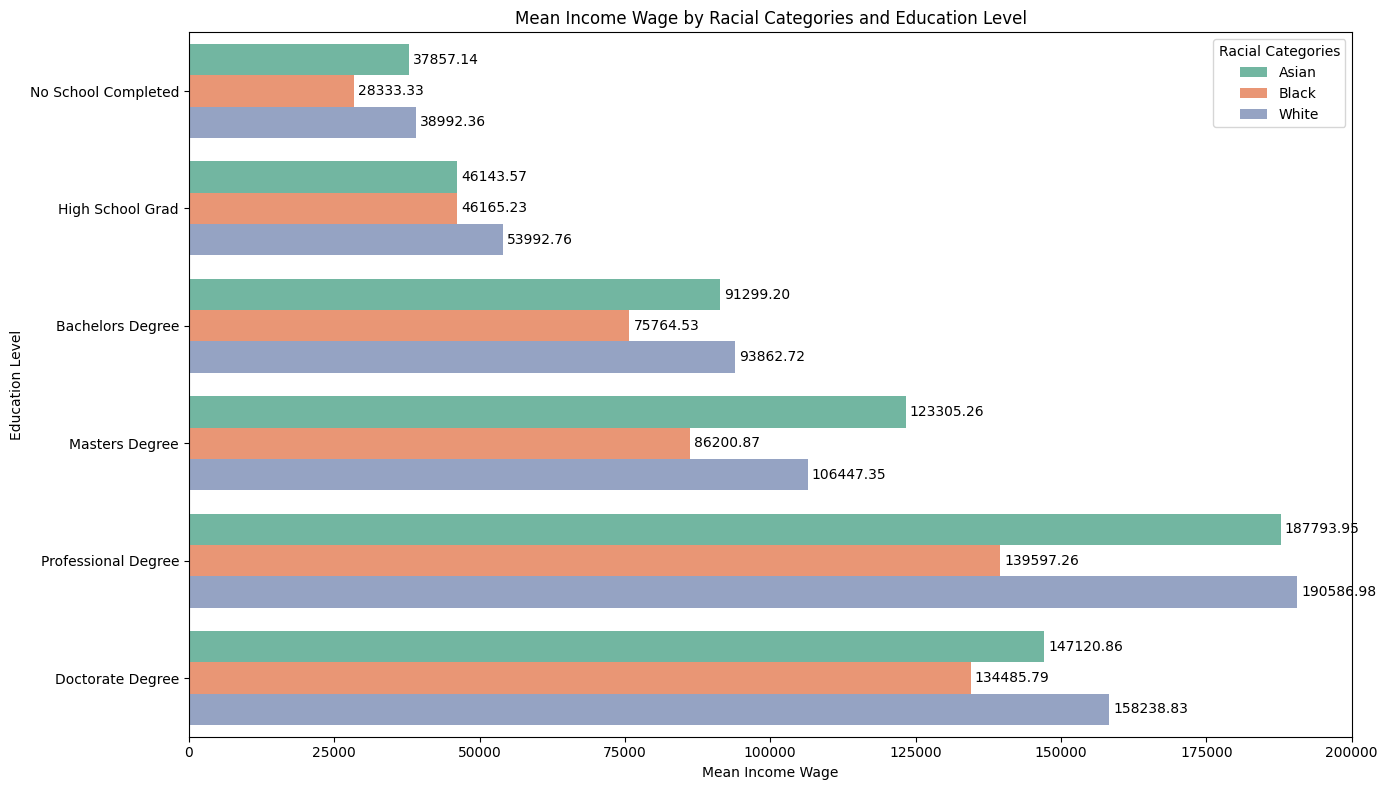

In [306]:
# # Generate the bar chart showing racial and educational disparities on Mean Income

plt.figure(figsize=(14, 8))  # Set the figure size for the plot
sns.barplot(
    x='incwage',
    y='education_level',
    hue='Racial Categories',
    data=sorted_mean_wage,
    palette='Set2',  # Color palette for visual distinction
    order=['No School Completed', 'High School Grad', 'Bachelors Degree', 'Masters Degree', 'Professional Degree', 'Doctorate Degree']
)

# Add labels and title
plt.xlabel('Mean Income Wage')
plt.ylabel('Education Level')
plt.title('Mean Income Wage by Racial Categories and Education Level')
plt.legend(title='Racial Categories')

# Display the values on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

##Hypothesis:

Education level is a significant predictor of mean income wage across racial categories, with disparities in income evident among racial groups.

The bar chart seems to illustrate a trend where higher educational attainment correlates with higher income, and there are distinct wage disparities among racial groups, with Asian individuals often at the higher end of the wage spectrum, particularly at advanced education levels.